## Attributes Description
#### •	age: The attribute of heart disease data indicates the age of the patient who has been taken into observation to identify heart disease.
#### •	sex: The attribute of heart disease data indicates the gender of the patient who has been taken into observation to identify heart disease.
#### •	cp: The attribute of the heart disease dataset indicates the type of chest pain that the patients have faced and observed. This is an important attribute that accelerates the identification process of heart disease. 
#### •	trtbps: The attribute of the heart disease dataset that implied the blood pressure of the patients while they were taking rest. 
#### •	chol: The attribute of the heart disease dataset indicates the value of cholesterol in the blood of the patient who has been taken into observation to identify heart disease.
#### •	fbs: The attribute of the heart disease dataset indicates the blood sugar level in the body of the patients who has been taken into observation to identify heart disease.
#### •	restecg: The attribute of the heart disease dataset indicates the electrocardiographic results at the resting condition of the patients who has been taken into observation to identify heart disease.
#### •	thalachh: The attribute of the heart disease dataset indicates the maximum heart rate that has been achieved from the patients while at the time of testing.
#### •	exng: The attribute of the heart disease dataset indicates the value of agina while at the time exercise by the patients.
#### •	oldpeak: The attribute of the heart disease dataset indicates the ST depression level that has been induced in the body of the patient at the time of exercise.
#### •	slope: The attribute of the heart disease dataset that indicates the depression level of the patient who has been taken into observation to identify heart disease.
#### •	ca: The attribute of the heart disease dataset indicates the count of the major vessels of the patients who were under the test for the determination of heart attack.
#### •	thal: The attribute of the heart disease dataset indicates the type of defect that has been found in the heart of the patients who has been taken into observation to identify heart disease.
#### •	disease: This is the dependent attribute of the data and will be used as the target data to predict whether the patient has heart disease. The attribute contain two labels that are labelled as 1 for heart disease and 0 for a healthy heart.


In [1]:
#importing all necessary libraries
from platform import python_version 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.rcParams["figure.figsize"]=[7,5]

In [2]:
#version check
python_version()

'3.9.12'

In [3]:
#inporting data
df = pd.read_csv(r"C:\Users\HP\Desktop\MSc Project\Myproject\Proj_ideas\UCI_heart_risk_prediction\Datasets\Kaggle_data\heart.csv")
#storing original data into a new variable
data = df.copy()

In [4]:
#Top 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#Shape check
df.shape

(1025, 14)

In [6]:
#null value check
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Text(0.5, 1.0, 'Target frequecies')

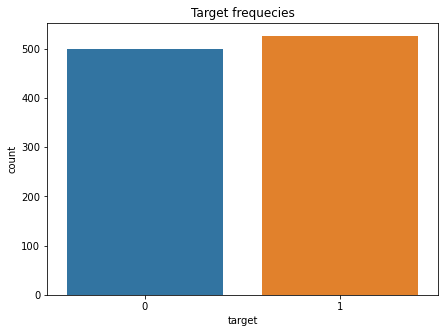

In [7]:
#target variables frequencies
sns.countplot(x="target",data=df)
plt.title("Target frequecies")

Text(0.5, 1.0, 'gender frequencies')

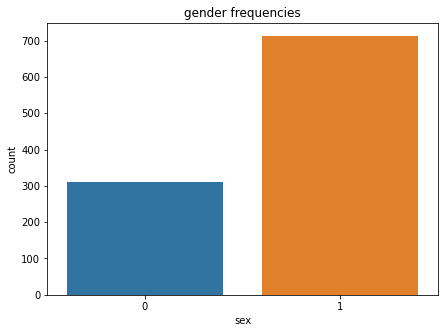

In [8]:
#gender label count
sns.countplot(x="sex",data=df)
plt.title("gender frequencies")

Text(0.5, 1.0, 'target count with respective gender')

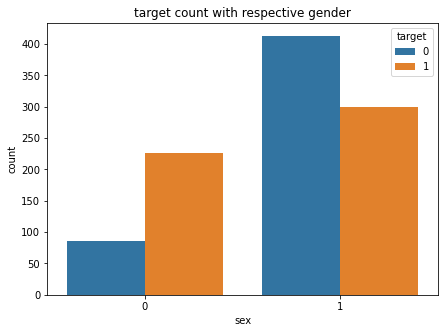

In [9]:
#sex frequency against target variable
sns.countplot(x="sex",hue="target",data=df)
plt.title("target count with respective gender")

In [44]:
#seperating data into cont and discrete variables
cont_variables = ["age","trestbps","chol","thalach"]
dis_variables = [column for column in df.columns if column not in cont_variables]

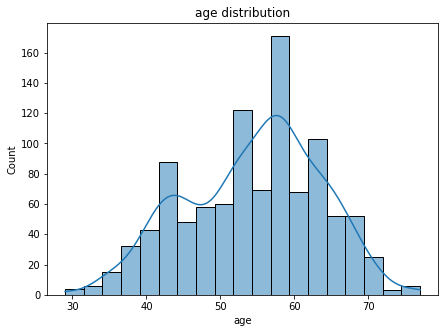

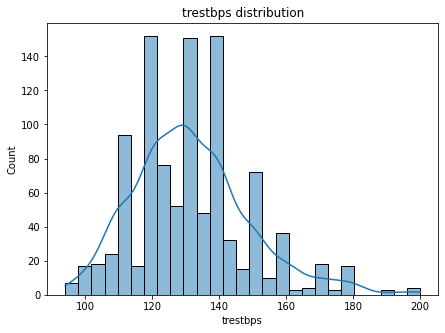

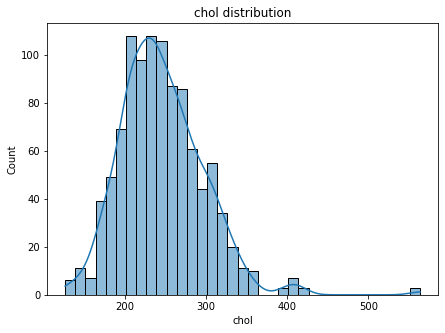

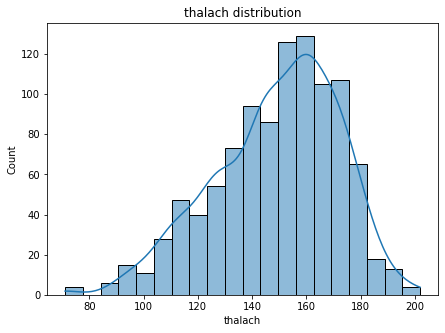

In [45]:
#funtion to plot the distribution of cont varibales
def hist_plotter(column_list,data):
    for column in column_list:
        sns.histplot(data[column],kde=True)
        plt.title(column+" distribution")
        plt.show()
hist_plotter(cont_variables,df)

In [46]:
df["thal"].unique()

array([3, 2, 1, 0], dtype=int64)

Text(0.5, 1.0, 'Heat Map')

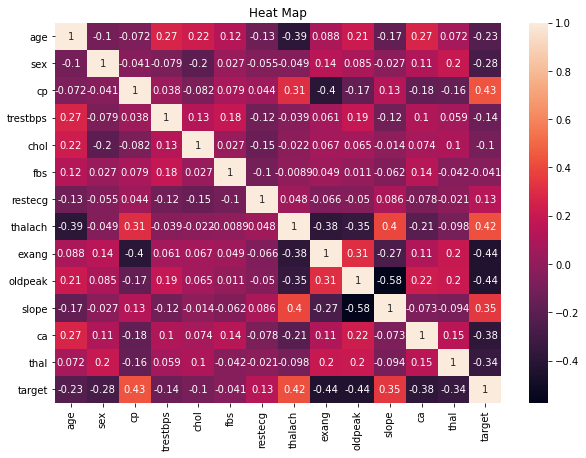

In [47]:
# heatmap for correlatioon
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title("Heat Map")

<AxesSubplot:xlabel='target'>

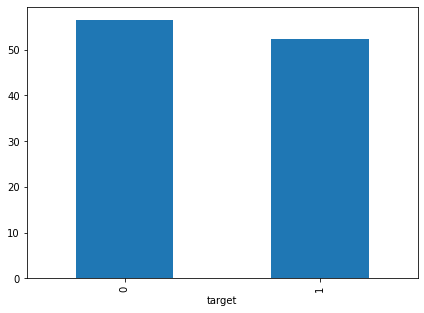

In [60]:
df.groupby(["target"])["age"].mean().plot(kind="bar")

<AxesSubplot:xlabel='target'>

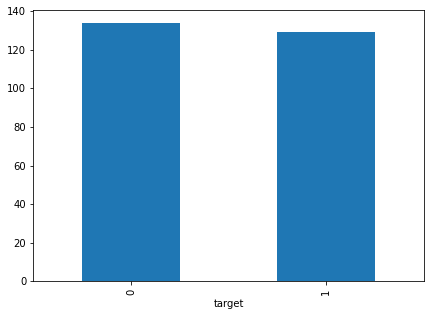

In [61]:
df.groupby(["target"])["trestbps"].mean().plot(kind="bar")

<AxesSubplot:xlabel='target'>

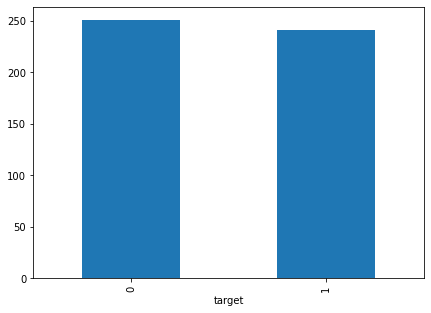

In [62]:
df.groupby(["target"])["chol"].mean().plot(kind="bar")

<AxesSubplot:xlabel='target'>

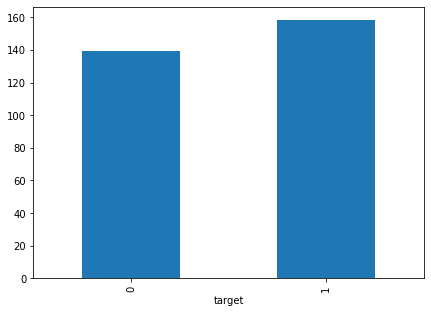

In [63]:
df.groupby(["target"])["thalach"].mean().plot(kind="bar")

In [48]:
# function to plot all disctrete against target variable
def dis_target_plotter(columns,data):
    for x in columns:
        if x!="target":
            sns.countplot(x = x,data=data,hue=data.target)
            plt.title(x+"_target")
            plt.show()

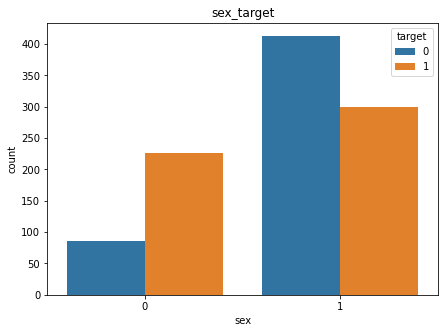

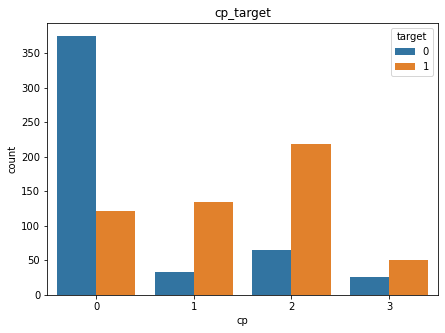

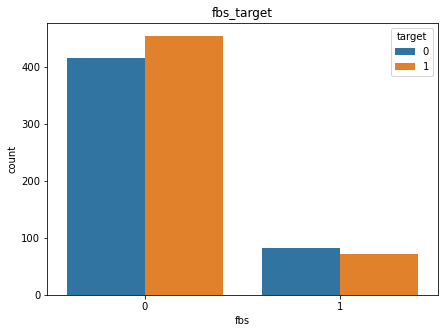

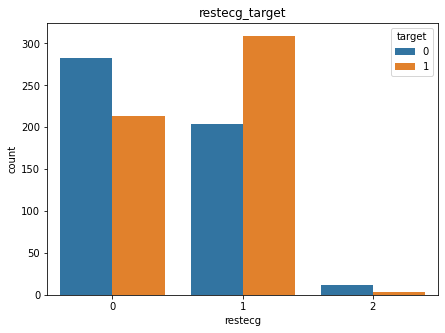

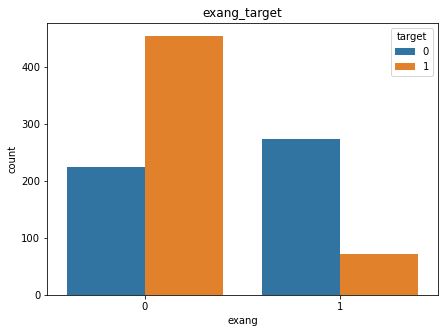

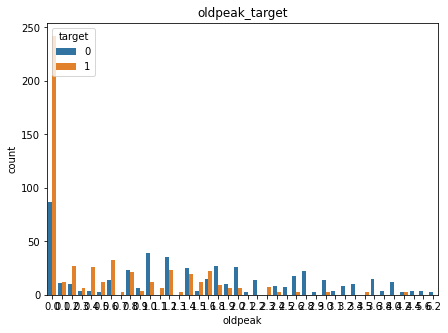

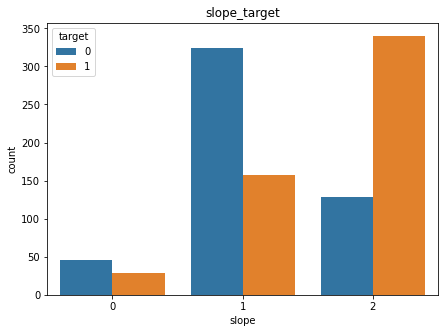

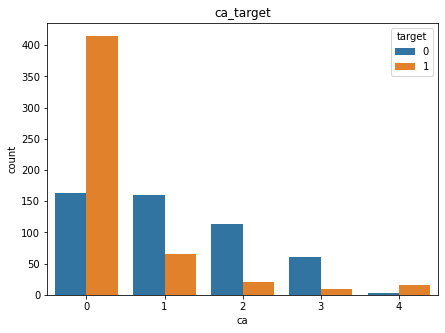

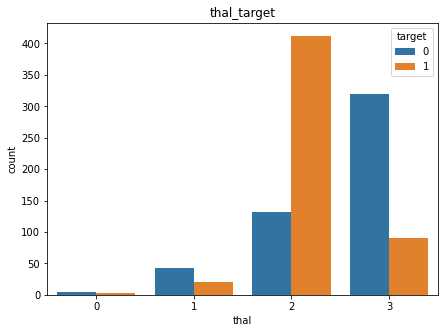

In [49]:
dis_target_plotter(dis_variables,df)

### Outliers checks

<AxesSubplot:xlabel='chol'>

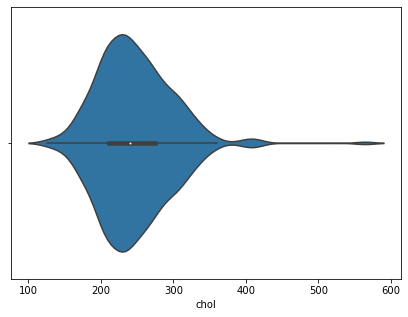

In [16]:
# Chol outliers check using violinplot
sns.violinplot(x="chol",data=df)

<AxesSubplot:xlabel='chol'>

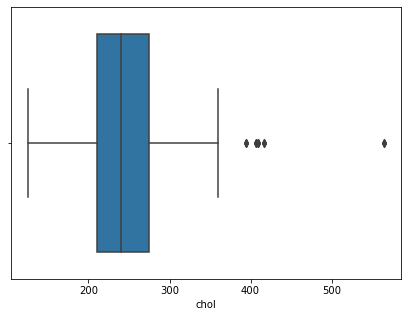

In [17]:
# Chol outliers check using boxplot
sns.boxplot(x="chol",data=df)

<AxesSubplot:xlabel='chol', ylabel='Count'>

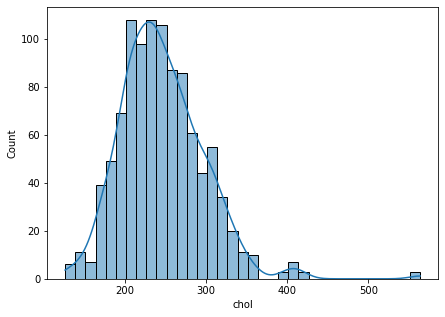

In [18]:
# Chol outliers check using distribution
sns.histplot(df["chol"],kde=True)

#### With all the above graphs, we can conclude that chol attribute needs outlier imputation.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

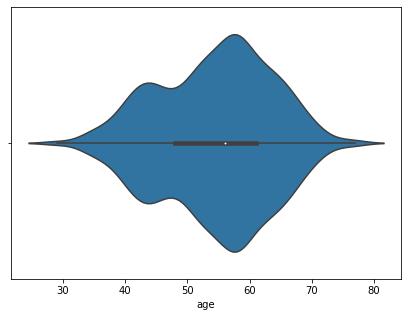

In [20]:
#Outliers check for age variable
sns.violinplot(df["age"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

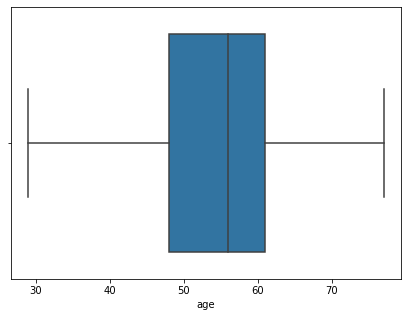

In [21]:
sns.boxplot(df["age"])

<AxesSubplot:xlabel='age', ylabel='Count'>

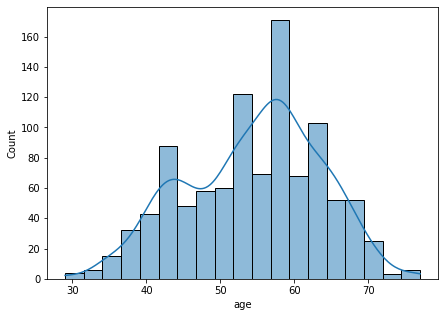

In [23]:
sns.histplot(df.age,kde=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

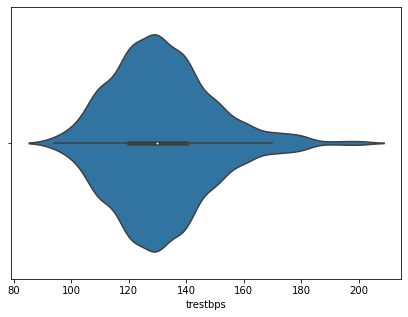

In [24]:
#Outliers check for trestbps
sns.violinplot(df.trestbps)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

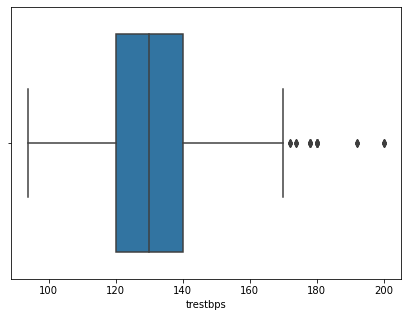

In [25]:
sns.boxplot(df.trestbps)

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

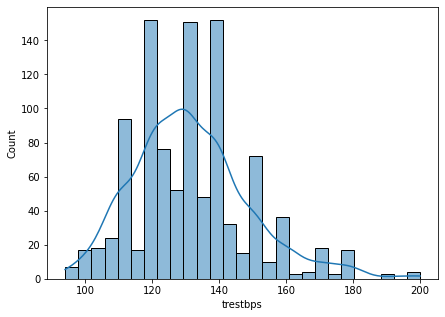

In [33]:
sns.histplot(df.trestbps,kde=True)

In [31]:
df.groupby(["target"])["trestbps"].mean()

target
0    134.106212
1    129.245247
Name: trestbps, dtype: float64

#### Looks like trestbps variable has some outliers, but they could be valid. So, requires further analysis.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

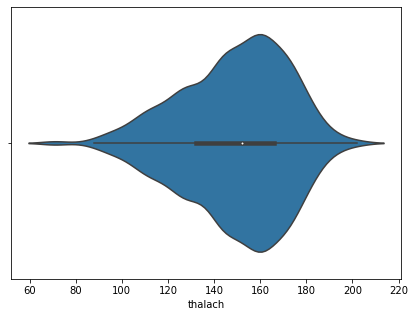

In [34]:
# Outliers check for thalach
sns.violinplot(df.thalach)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

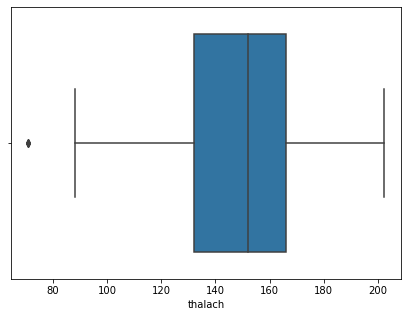

In [36]:
sns.boxplot(df.thalach)

<AxesSubplot:xlabel='thalach', ylabel='Count'>

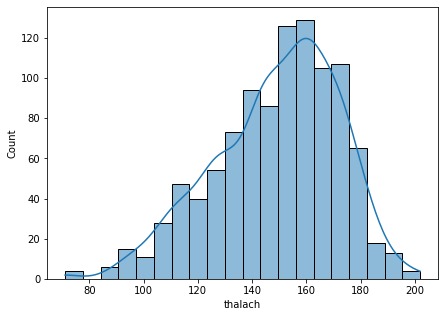

In [39]:
sns.histplot(df["thalach"],kde=True)

#### Seems there is one outlier in thalach column; requires outlier imputation.